<a href="https://colab.research.google.com/github/lacerdamj/Sistemas-Lineares/blob/main/EDOcomentrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistemas Lineares**
# Solução da equação não homogênea

*Escrito por Márcio J. Lacerda*

In [1]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt


 Considere o sistema descrito pela equação diferencial
$$
   \ddot{y}(t)+3\dot{y}(t)+2y(t)= \dot{u}(t)+4u(t), 
$$
com condições iniciais
$$
\quad y(0)=2, \quad \dot{y}(0)=1,
$$
e entrada $u(t)=e^{-3t}$.

Aplicando o operador $p=\frac{d}{dt}$, tem-se

$$
\left(p^2+3p+2\right)y(t)= \left(p+4\right)u(t). 
$$

Nosso objetivo é transformar a equação $N(p)y(t)=D(p)u(t)$ em uma equação homogênea. 

Para este fim, devemos encontrar um polinômio $\bar{D}(p)$ tal que 

$$
\bar{D}(p)N(p)y(t)=\bar{D}(p)D(p)u(t)=0
$$

O polinômio $\bar{D}(p)$ deve ser escolhido para anular a entrada ou seja $\bar{D}(p)u(t)=0$. Essa escolha é feita levando em consideração o modo próprio associado à entrada $u(t)$.

No exemplo a entrada dada é $u(t)=e^{-3t}$, logo está associada a um polinômio com raiz $-3$. Desta forma tem-se $\bar{D}(p)=(p+3)$.


Para confirmar, podemos checar se a igualdade $\bar{D}(p)u(t)=0$ é verdadeira:
\begin{align}
\bar{D}(p)u(t)&=0, \\
(p+3)e^{-3t} &=0, \\
-3e^{-3t}+3e^{-3t}&=0.
\end{align}

Confirmando que $\bar{D}(p)u(t)=0$, podemos escrever:
$$
\left(p+3\right)\left(p^2+3p+2\right)y(t)= \left(p+3\right)\left(p+4\right)u(t)=0, 
$$
ou simplesmente 
$$
\left(p+3\right)\left(p^2+3p+2\right)y(t)=0, 
$$
que é uma equação homogênea, de ordem $3$. 

Entretanto, foram dadas apenas duas condições iniciais. Para caracterizar a solução precisamos encontrar a terceira condição inicial $\ddot{y}(0)$.

Usando a equação original e a equação da entrada calcula-se

\begin{align}
\ddot{y}(0)&=-3\dot{y}(0)-2y(0)+\dot{u}(0)+4u(0),\\
\ddot{y}(0)&=-3\times 1-2\times 2 -3e^{0}+4e^{0}, \\
\ddot{y}(0)&=-6.
\end{align}

Note que, apesar de não influenciar na determinação de $\bar{D}(p)$, o polinômio $N(p)$ influenciou na determinação da condição inicial $\ddot{y}(0)$, uma vez que a equação original do sistema é utilizada.

A partir da equação característica:
$$
\left(\lambda+3\right)\left(\lambda^2+3\lambda+2\right)y(t)=0, 
$$
encontra-se as raízes $\lambda_1=-1$, $\lambda_2=-2$ e $\lambda_3=-3$. Três raízes distintas, logo a solução tem a seguinte forma:
$$
y(t)=C_1e^{\lambda_1t}+C_2e^{\lambda_2t}+C_3e^{\lambda_3t}.
$$

ou simplesmente:
$$
y(t)=C_1e^{-t}+C_2e^{-2t}+C_3e^{-3t}.
$$
Calculando as derivadas tem-se
$$
\dot{y}(t)=-C_1e^{-t}-2C_2e^{-2t}-3C_3e^{-3t},
$$

$$
\ddot{y}(t)=C_1e^{-t}+4C_2e^{-2t}+9C_3e^{-3t}.
$$
Substituindo no ponto $t=0$ obtem-se 


\begin{align}
y(0)&=C_1+C_2+C_3=2, \\
\dot{y}(0)&=-C_1-2C_2-3C_3=1, \\
\ddot{y}(0)&=C_1+4C_2+9C_3=-6.
\end{align}

Tem-se um sistema linear com três equações e três incógnitas. Diferentes métodos podem ser usados para solucionar este problema. Escrevendo na forma matricial:

$$
\begin{bmatrix}1 & 1 & 1 \\ -1 & -2 & -3 \\ 1& 4 & 9\end{bmatrix}
\begin{bmatrix}C_1 \\ C_2 \\ C_3\end{bmatrix}=
\begin{bmatrix}2 \\-1 \\-6 \end{bmatrix}
$$

Na sequência a solução é apresentada:

In [2]:
A = np.array([[1, 1, 1], [-1,-2,-3], [1, 4, 9]])
b = np.array([2, 1, -6])
C = np.linalg.solve(A, b)

#Mostra a resposta obtida
print("Os valores das constantes são dados por",C)


Os valores das constantes são dados por [ 5.5 -4.   0.5]


Logo, a solução pode ser escrita como
$$
y(t)=\frac{11}{2}e^{-t}-4e^{-2t}+\frac{1}{2}e^{-3t}.
$$

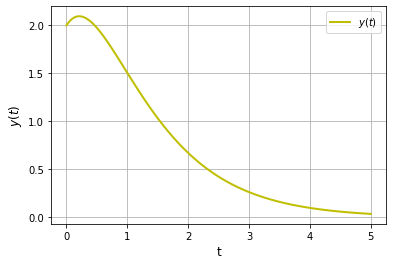

In [3]:
t0 = 0   #tempo inicial
tf = 5  #tempo final
n = 1000   #número de pontos

#a função linspace define um intervalo de t0 até tf 
#igualmente espaçado em n pontos
t = np.linspace(t0, tf, n)

#Defina a função y
y = (11/2)*np.exp(-t)-(4)*np.exp(-2*t)+(1/2)*np.exp(-3*t)


# inicia a figura
fg, ax = plt.subplots(1, 1)
#plota no eixo horizontal a variável t e no vertical a variável y
ax.plot(t,y,'y', label="$y(t)$", linewidth=2)

#insere uma grade no gráfico
ax.grid(True)
#posiciona a legenda na melhor localização
ax.legend(loc='best')
#insere informação do eixo vertical
plt.ylabel('$y(t)$', fontsize=12)
#insere informação do eixo horizontal
plt.xlabel('t', fontsize=12)
fg.canvas.draw()

Para verificar se as condições iniciais estão sendo satisfeitas vamos calcular as derivadas $\dot{y}(t)$ e $\ddot{y}(t)$ 

In [4]:
import sympy as sp

t = sp.Symbol('t')
y = (11/2)*sp.exp(-t)-4*sp.exp(-2*t)+(1/2)*sp.exp(-3*t)

yd=sp.diff(y, t)

#Mostra a resposta obtida
print("A derivada do sinal é dada por",yd,".")

ydd=sp.diff(yd, t)

#Mostra a resposta obtida
print("A derivada segunda do sinal é dada por",ydd,".")

A derivada do sinal é dada por -5.5*exp(-t) + 8*exp(-2*t) - 1.5*exp(-3*t) .
A derivada segunda do sinal é dada por 5.5*exp(-t) - 16*exp(-2*t) + 4.5*exp(-3*t) .


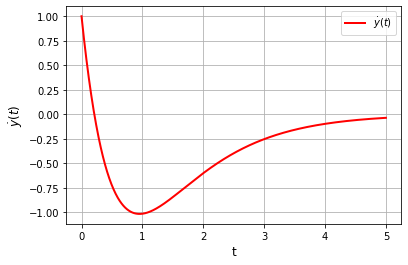

In [5]:
t0 = 0   #tempo inicial
tf = 5  #tempo final
n = 1000   #número de pontos

#a função linspace define um intervalo de t0 até tf 
#igualmente espaçado em n pontos
t = np.linspace(t0, tf, n)


#Defina a função yd
yd = -(11/2)*np.exp(-t)+8*np.exp(-2*t)-(3/2)*np.exp(-3*t)

# inicia a figura
fg, ax = plt.subplots(1, 1)
#plota no eixo horizontal a variável t e no vertical a variável yd
ax.plot(t,yd,'r', label="$\dot{y}(t)$", linewidth=2)

#insere uma grade no gráfico
ax.grid(True)
#posiciona a legenda na melhor localização
ax.legend(loc='best')
#insere informação do eixo vertical
plt.ylabel('$\dot{y}(t)$', fontsize=12)
#insere informação do eixo horizontal
plt.xlabel('t', fontsize=12)
fg.canvas.draw()

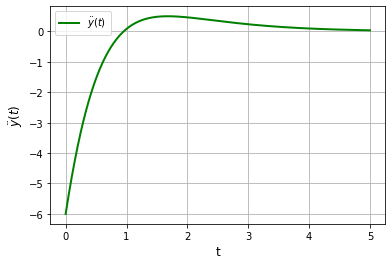

In [6]:
#Defina a função ydd
ydd = (11/2)*np.exp(-t)-16*np.exp(-2*t)+(9/2)*np.exp(-3*t)

# inicia a figura
fg, ax = plt.subplots(1, 1)
#plota no eixo horizontal a variável t e no vertical a variável yd
ax.plot(t,ydd,'g', label="$\ddot{y}(t)$", linewidth=2)

#insere uma grade no gráfico
ax.grid(True)
#posiciona a legenda na melhor localização
ax.legend(loc='best')
#insere informação do eixo vertical
plt.ylabel('$\ddot{y}(t)$', fontsize=12)
#insere informação do eixo horizontal
plt.xlabel('t', fontsize=12)
fg.canvas.draw()

Pelas figuras, confirmamos que a solução está correta e que todas as condições iniciais dadas foram atendidas.